In [1]:
#To implement a recommendation system using deep learning with Keras,
#Use a public dataset like the MovieLens dataset from tensorflow_datasets for a collaborative filtering recommendation system
#Import Libraries and Load the Dataset
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np

#https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset?select=ratings.csv            kaggle dataset source
# Load MovieLens dataset
data = tfds.load("movielens/100k-ratings", split="train")   #https://www.tensorflow.org/datasets/catalog/movielens
df = tfds.as_dataframe(data)    #converts the TensorFlow dataset into a pandas DataFrame for easier data manipulation

# Filter and preprocess the dataset
df = df[['user_id', 'movie_id', 'user_rating']]  # Filtering or keep relevant columns
df['user_id'] = df['user_id'].astype("category").cat.codes  #categorical variables and converts them into integer codes
df['movie_id'] = df['movie_id'].astype("category").cat.codes

num_users = df['user_id'].nunique()
num_movies = df['movie_id'].nunique()

print(f"Number of users: {num_users}, Number of movies: {num_movies}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/incomplete.OUNYWY_0.1.1/movielens-train.tfrecord*..…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.
Number of users: 943, Number of movies: 1682


<ipython-input-1-e254e73475b7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = df['user_id'].astype("category").cat.codes  #categorical variables and converts them into integer codes
<ipython-input-1-e254e73475b7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movie_id'] = df['movie_id'].astype("category").cat.codes


In [3]:
#Define Model Architecture - collaborative filtering recommendation system
# Parameters
embedding_dim = 50
#each user and movie will be represented by a 50-dimensional vector in the embedding space

# Input layers
user_input = Input(shape=(1,), name='user_input')   #expects a single integer input for each user
movie_input = Input(shape=(1,), name='movie_input')

# Creating Two Embedding layers for mapping
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
movie_embedding = Embedding(input_dim=num_movies, output_dim=embedding_dim, name='movie_embedding')(movie_input)

# Flatten embeddings
user_vector = Flatten()(user_embedding)
movie_vector = Flatten()(movie_embedding)

# Concatenate embeddings and pass through dense layers
merged_vector = Concatenate()([user_vector, movie_vector])
dense1 = Dense(128, activation='relu')(merged_vector)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1)(dense2)  # Output layer for regression

# Build and compile model
model = Model(inputs=[user_input, movie_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ movie_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 50)          │         47,150 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ movie_embedding           │ (None, 1, 50)          │         84,100 │ movie_input[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 50)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 50)             │              0 │ movie_embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 100)            │              0 │ flatten_2[0][0],       │
│ (Concatenate)             │                        │                │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │         12,928 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             65 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 152,499 (595.70 KB)

 Trainable params: 152,499 (595.70 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#Prepare Training and Test Data
from sklearn.model_selection import train_test_split

# Split data
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Prepare inputs for training and testing
train_user = np.array(train['user_id'])
train_movie = np.array(train['movie_id'])
train_rating = np.array(train['user_rating'])

test_user = np.array(test['user_id'])
test_movie = np.array(test['movie_id'])
test_rating = np.array(test['user_rating'])

In [5]:
#Train the Model
history = model.fit(
    [train_user, train_movie],
    train_rating,
    epochs=10,
    batch_size=64,
    validation_data=([test_user, test_movie], test_rating)
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.5441 - mae: 1.1594 - val_loss: 0.9153 - val_mae: 0.7527
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8760 - mae: 0.7412 - val_loss: 0.8887 - val_mae: 0.7418
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.8367 - mae: 0.7224 - val_loss: 0.8855 - val_mae: 0.7526
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8051 - mae: 0.7068 - val_loss: 0.8692 - val_mae: 0.7323
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7517 - mae: 0.6827 - val_loss: 0.8662 - val_mae: 0.7301
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6974 - mae: 0.6561 - val_loss: 0.8932 - val_mae: 0.7439
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6454 - mae: 0.6296 - val_loss: 0.8920 - val_mae: 0.7405
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5886 - mae: 0.5999 - val_loss: 0.9156 - val_mae: 0.7474
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━

In [6]:
# Evaluate on test data
test_loss, test_mae = model.evaluate([test_user, test_movie], test_rating)
print(f"Test MAE: {test_mae:.2f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9730 - mae: 0.7695
Test MAE: 0.77


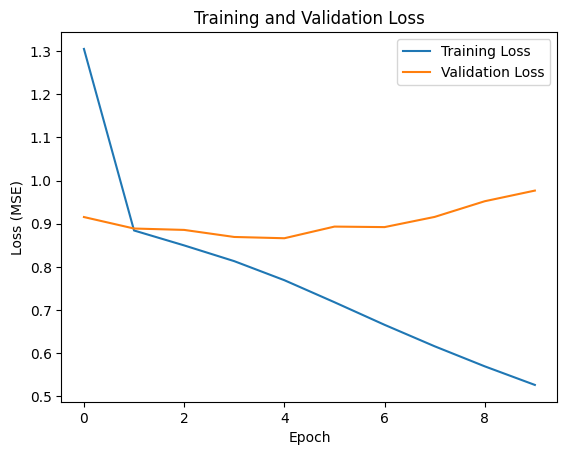

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [8]:
# Get recommendations for a specific user
user_id = 5  # Example user
all_movie_ids = np.array([i for i in range(num_movies)])

# Predict ratings for all movies
user_ids = np.array([user_id] * num_movies)  # Repeat the user ID for all movies
predicted_ratings = model.predict([user_ids, all_movie_ids])

# Sort movies by predicted rating and recommend top ones
top_movie_indices = np.argsort(predicted_ratings[:, 0])[::-1][:10]
print(f"Top 10 recommendations for User {user_id}:")
print(top_movie_indices)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Top 10 recommendations for User 5:
[ 189  479  548  804 1248  942 1099 1615 1516   95]


In [9]:
#display recall and precision values for the recommendation system,
#we can treat it as a binary classification task (e.g., a recommended item is either relevant or not) based on whether predicted ratings meet a certain threshold.
#Convert Ratings to Binary Relevance Labels
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

# Define a threshold to classify ratings as relevant or not
threshold = 3.5  # Ratings above this are considered relevant

# Convert test ratings to binary labels
binary_test_labels = (test_rating >= threshold).astype(int)

In [10]:
#Make Predictions and Convert to Binary Labels
# Make predictions on the test set
predicted_ratings = model.predict([test_user, test_movie]).flatten()

# Convert predicted ratings to binary labels
binary_predicted_labels = (predicted_ratings >= threshold).astype(int)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [11]:
#Calculate Precision, Recall, and Precision-Recall Curve
# Calculate precision and recall
precision = precision_score(binary_test_labels, binary_predicted_labels)
recall = recall_score(binary_test_labels, binary_predicted_labels)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

# Calculate precision-recall values for plotting
precision_values, recall_values, _ = precision_recall_curve(binary_test_labels, predicted_ratings)

Precision: 0.72, Recall: 0.74


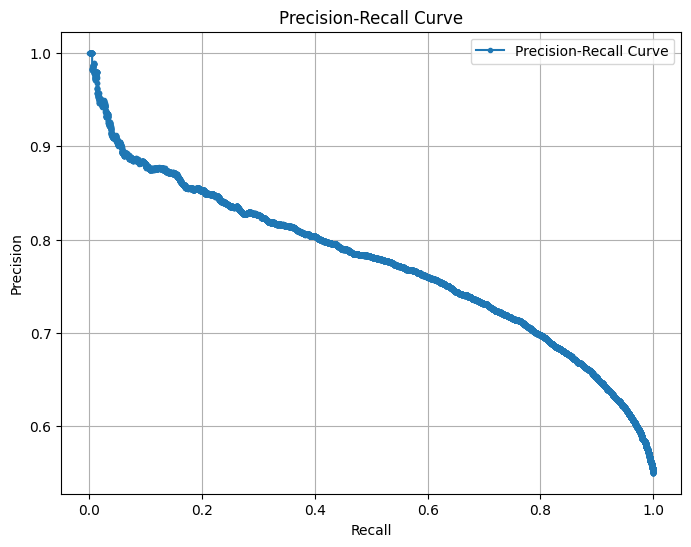

In [12]:
#Visualize Precision-Recall Curve
import matplotlib.pyplot as plt

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [13]:
#F1 Score for Additional Evaluation
from sklearn.metrics import f1_score

f1 = f1_score(binary_test_labels, binary_predicted_labels)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.73
